# Janta Hackathon: HR Analytics [Train Set]

## Problem Statement
A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. <br>
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.<br>
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

### Data Dictionary 

**enrollee_id:** Unique ID for enrollee<br>

**city:** City code<br>

**city_development_index:** Developement index of the city (scaled)<br>

**gender: Gender:** Relevent experience<br>

**enrolled_university:** Type of University course enrolled if any<br>

**education_level:** Education level<br>

**major_discipline:** Major discipline<br>

**experience:** Total experience in years<br>

**company_size:** No of employees in current employer's company<br>

**company_type:** Type of current employer<br>

**last_new_job:** Difference in years between previous job and current job<br>

**training_hours:** training hours completed<br>

**target:** 0 – Not looking for job change, 1 – Looking for a job change

## 1. Import the libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

## 2. Import the dataset

In [2]:
# import the training set
df_hr_train = pd.read_csv('train.csv')

# print the shape of the train set
print('Shape: ', df_hr_train.shape)

# print the first 5 observations
df_hr_train.head()

Shape:  (18359, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [3]:
# import the test set
df_hr_test = pd.read_csv('test.csv')

# print the shape of the train set
print('Shape: ', df_hr_test.shape)

# print the first 5 observations
df_hr_test.head()

Shape:  (15021, 13)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [4]:
# storing the enrollee_id 
enrollee_id = df_hr_test.enrollee_id

## 3. Understand the datatypes

In [5]:
df_hr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

The variables `city_development_index` and `training_hours` have a numerical datatype. Other variables are categorical. `target` is our target/dependent variable.

#### Look for the unique classes in the categorical variables

In [6]:
# separating the categorical values from the dataset
df_cat = df_hr_train.select_dtypes(include=[np.object])

# running a for loop to count the length of unique values in each categorical column
for cols in df_cat:
    print(cols, " : ", len(df_cat[cols].unique()))

city  :  123
gender  :  4
relevent_experience  :  2
enrolled_university  :  4
education_level  :  6
major_discipline  :  7
experience  :  23
company_size  :  9
company_type  :  7
last_new_job  :  7


## 4. Look for missing values

In [7]:
# total missing values in each column
total_missing_in_each_column = list(df_hr_train.isnull().sum())

# percentage of missing values in each column
percentage_missing_in_each_column = list((df_hr_train.isnull().sum() / df_hr_train.shape[0]) * 100)

# column names
columns = list(df_hr_train.columns)

# datatypes of each column
dtypes = list(df_hr_train.dtypes)

# create a dataframe to display the missing values count
pd.DataFrame({'Column': columns, 
              'Total Missing Values': total_missing_in_each_column, 
              '(%) Missing Values': percentage_missing_in_each_column,
              'Data Type': dtypes}).sort_values('Total Missing Values', ascending=False)

,Column,Total Missing Values,(%) Missing Values,Data Type
10,company_type,5039,27.447029,object
9,company_size,4779,26.030830,object
3,gender,4098,22.321477,object
7,major_discipline,2838,15.458358,object
6,education_level,457,2.489242,object
11,last_new_job,367,1.999020,object
5,enrolled_university,342,1.862847,object
8,experience,59,0.321368,object
0,enrollee_id,0,0.000000,int64
1,city,0,0.000000,object


There are missing values in all the categorical features except `city`. There are no missing values in the numerical features

#### Impute the missing values using `mode`

In [8]:
for cols in df_hr_train:
    df_hr_train[cols] = df_hr_train[cols].replace(np.nan, df_hr_train[cols].mode()[0])

#### Rechecking the missing values

In [9]:
# total missing values in each column
total_missing_in_each_column = list(df_hr_train.isnull().sum())

# percentage of missing values in each column
percentage_missing_in_each_column = list((df_hr_train.isnull().sum() / df_hr_train.shape[0]) * 100)

# column names
columns = list(df_hr_train.columns)

# datatypes of each column
dtypes = list(df_hr_train.dtypes)

# create a dataframe to display the missing values count
pd.DataFrame({'Column': columns, 
              'Total Missing Values': total_missing_in_each_column, 
              '(%) Missing Values': percentage_missing_in_each_column,
              'Data Type': dtypes}).sort_values('Total Missing Values', ascending=False)

,Column,Total Missing Values,(%) Missing Values,Data Type
0,enrollee_id,0,0.0,int64
1,city,0,0.0,object
2,city_development_index,0,0.0,float64
3,gender,0,0.0,object
4,relevent_experience,0,0.0,object
5,enrolled_university,0,0.0,object
6,education_level,0,0.0,object
7,major_discipline,0,0.0,object
8,experience,0,0.0,object
9,company_size,0,0.0,object


#### Check missing values for test data

In [10]:
# total missing values in each column
total_missing_in_each_column = list(df_hr_test.isnull().sum())

# percentage of missing values in each column
percentage_missing_in_each_column = list((df_hr_test.isnull().sum() / df_hr_test.shape[0]) * 100)

# column names
columns = list(df_hr_test.columns)

# datatypes of each column
dtypes = list(df_hr_test.dtypes)

# create a dataframe to display the missing values count
pd.DataFrame({'Column': columns, 
              'Total Missing Values': total_missing_in_each_column, 
              '(%) Missing Values': percentage_missing_in_each_column,
              'Data Type': dtypes}).sort_values('Total Missing Values', ascending=False)

,Column,Total Missing Values,(%) Missing Values,Data Type
10,company_type,4330,28.826310,object
9,company_size,4051,26.968910,object
3,gender,3388,22.555090,object
7,major_discipline,2393,15.931030,object
6,education_level,395,2.629652,object
11,last_new_job,304,2.023833,object
5,enrolled_university,279,1.857400,object
8,experience,44,0.292923,object
0,enrollee_id,0,0.000000,int64
1,city,0,0.000000,object


#### Impute the missing values using `mode` in test set

In [11]:
for cols in df_hr_test:
    df_hr_test[cols] = df_hr_test[cols].replace(np.nan, df_hr_train[cols].mode()[0])

##  5. Remove the insignificant variable `enrollee_id`

In [12]:
# dropping the column enrollee_id from train data
df_hr_train.drop('enrollee_id', axis = 1, inplace = True)

In [13]:
# dropping the column enrollee_id from test data
df_hr_test.drop('enrollee_id', axis = 1, inplace = True)

## 6. Exploratory Data Analysis

In [14]:
plt.rcParams["figure.figsize"] = (15,8)

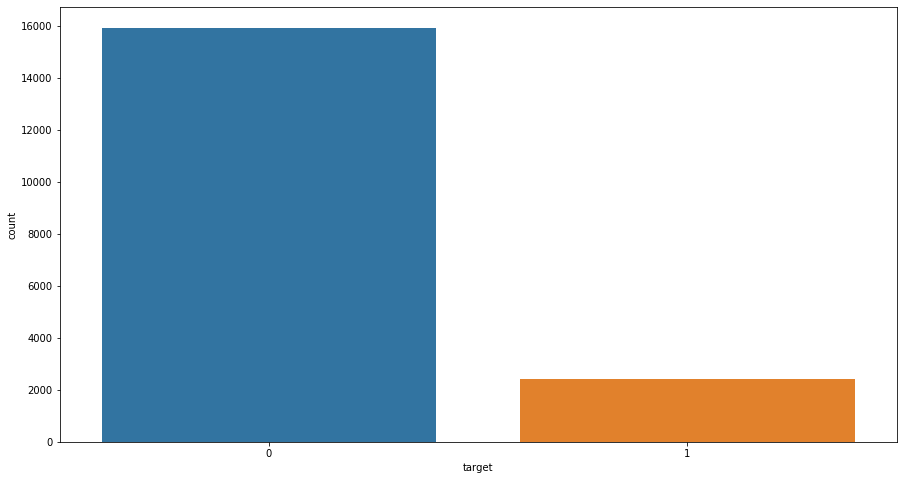

In [15]:
sns.countplot(x = 'target', data = df_hr_train)

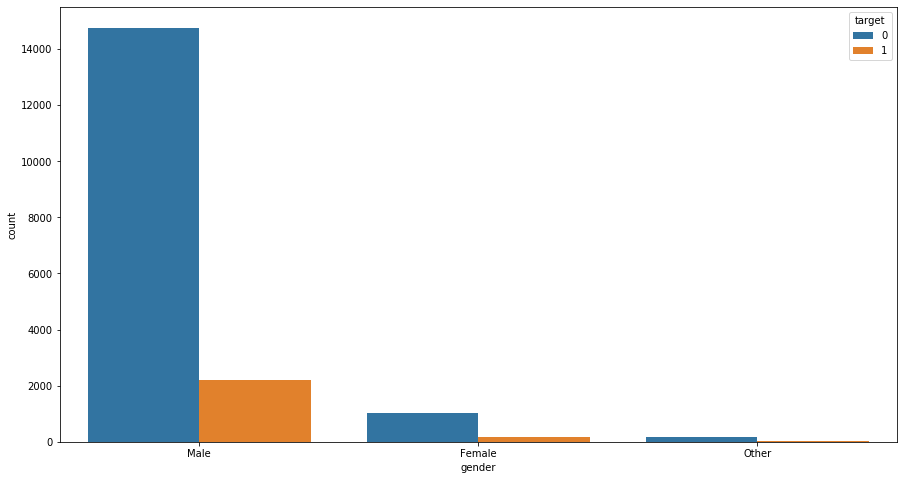

In [16]:
sns.countplot(x = 'gender', hue='target', data = df_hr_train)

In [17]:
df_hr_train.target[df_hr_train.gender == 'Male'].value_counts()

0    14765
1     2217
Name: target, dtype: int64

In [18]:
df_hr_train.target[df_hr_train.gender == 'Female'].value_counts()

0    1009
1     179
Name: target, dtype: int64

In [19]:
df_hr_train.target[df_hr_train.gender == 'Other'].value_counts()

0    160
1     29
Name: target, dtype: int64

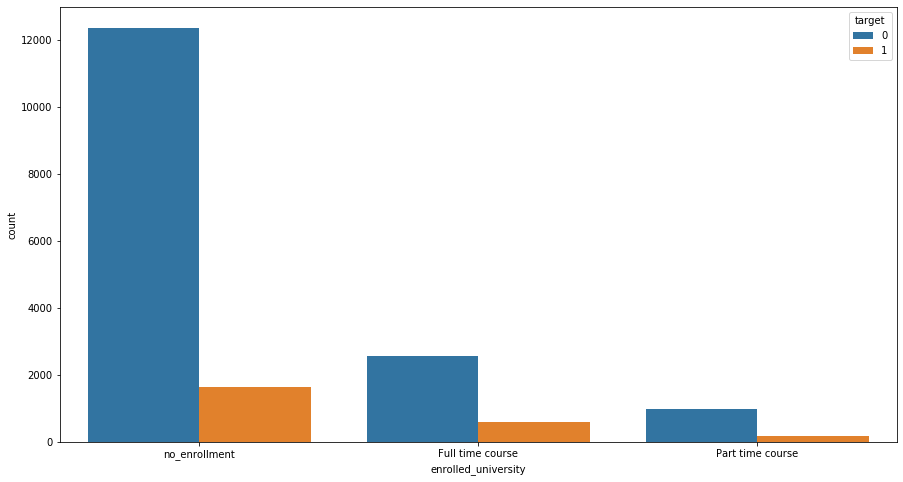

In [20]:
sns.countplot(x = 'enrolled_university', hue='target', data = df_hr_train)

In [21]:
df_hr_train.target[df_hr_train.enrolled_university == 'no_enrollment'].value_counts()

0    12357
1     1644
Name: target, dtype: int64

In [22]:
df_hr_train.target[df_hr_train.enrolled_university == 'Full time course'].value_counts()

0    2580
1     607
Name: target, dtype: int64

In [23]:
df_hr_train.target[df_hr_train.enrolled_university == 'Part time course'].value_counts()

0    997
1    174
Name: target, dtype: int64

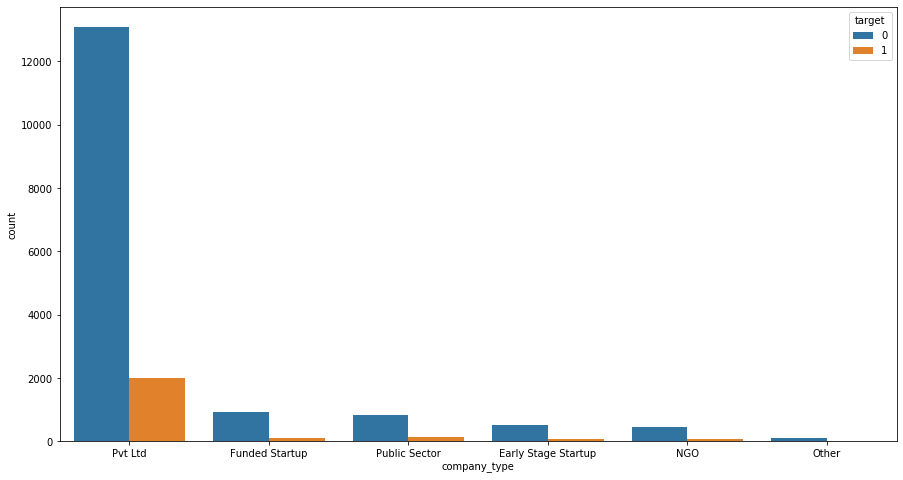

In [24]:
sns.countplot(x = 'company_type', hue='target', data = df_hr_train)

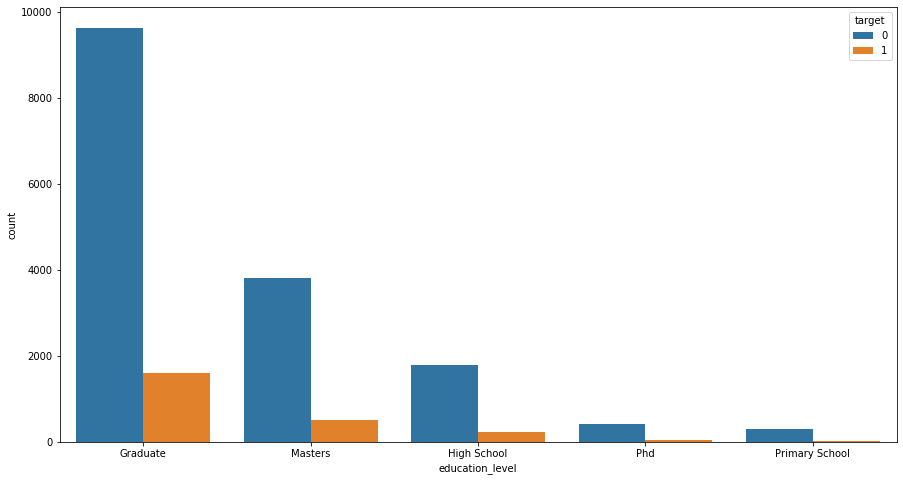

In [25]:
sns.countplot(x = 'education_level', hue='target', data = df_hr_train)

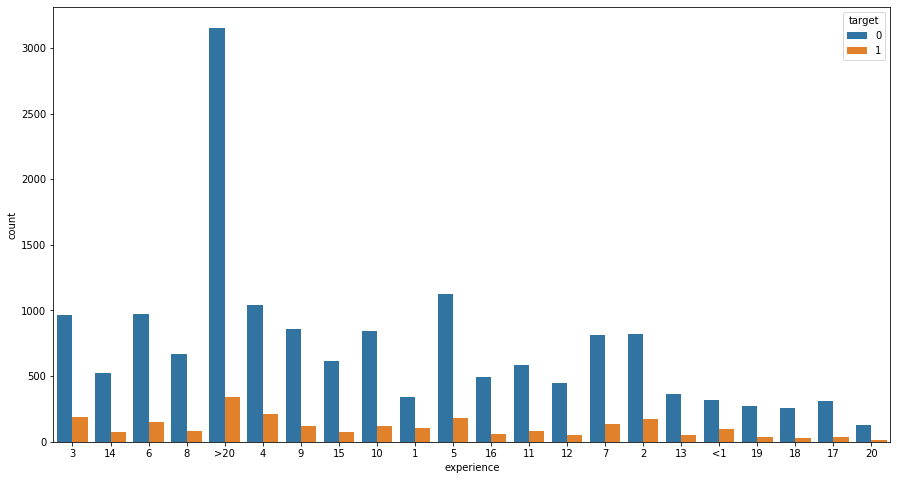

In [26]:
sns.countplot(x = 'experience', hue='target', data = df_hr_train)

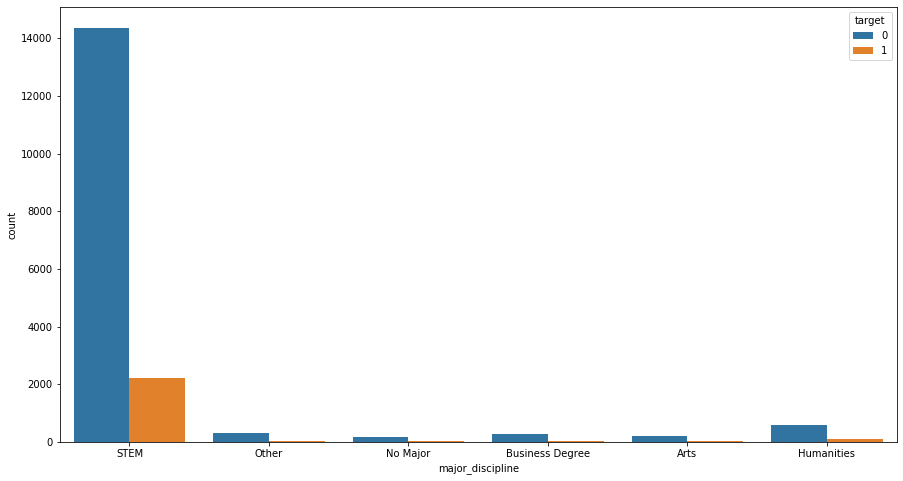

In [27]:
sns.countplot(x = 'major_discipline', hue='target', data = df_hr_train)

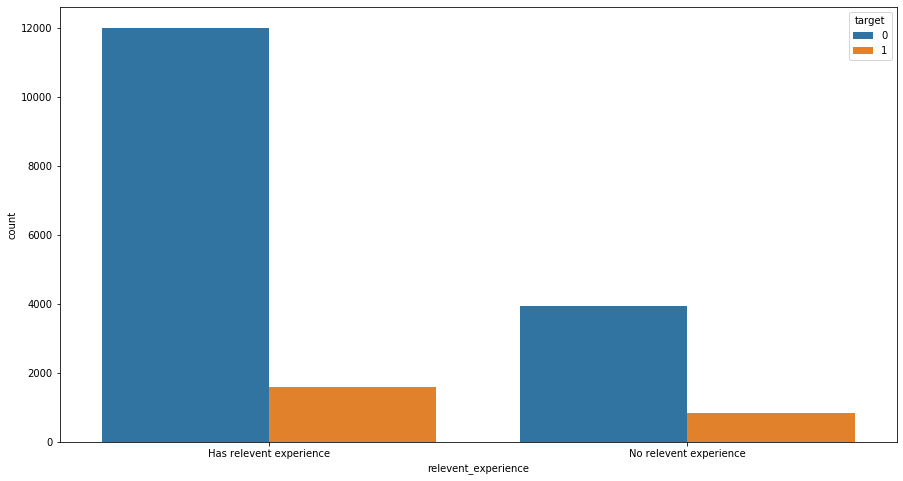

In [28]:
sns.countplot(x = 'relevent_experience', hue='target', data = df_hr_train)

In [29]:
df_hr_train.skew()

city_development_index   -1.327356
training_hours            1.813030
target                    2.173404
dtype: float64

## 7. Imbalanced Classes

In [30]:
df_hr_train.target.value_counts()

0    15934
1     2425
Name: target, dtype: int64

In [31]:
from sklearn.utils import resample

# separate the classes
looking_for_job = df_hr_train[df_hr_train.target == 1]
not_looking_for_job = df_hr_train[df_hr_train.target == 0]

# upsample the looking_for_job cases
df_minority_upsampled = resample(looking_for_job,
                                replace = True,
                                n_samples = 15934)

# combine the majority class with the upsampled majority class
new_df_hr_train = pd.concat([not_looking_for_job, df_minority_upsampled])

In [32]:
new_df_hr_train.target.value_counts()

1    15934
0    15934
Name: target, dtype: int64

In [33]:
from sklearn.utils import shuffle
new_df_hr_train = shuffle(new_df_hr_train)

## 7. Separating the independent and the target variable

In [34]:
# store the target variable in df_target
df_target = new_df_hr_train.target

# deleting the target variable from the dataframe
del new_df_hr_train['target']

## 9. Dummy Encoding

In [35]:
# dummy encode the categorical variables of the train data
df_encoded = pd.get_dummies(new_df_hr_train, drop_first=True)
df_encoded.head()

,city_development_index,training_hours,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
13316,0.924,62,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
5172,0.926,13,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
17088,0.920,34,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9753,0.903,270,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3373,0.899,34,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
# dummy encode the categorical variables of the test data
df_encoded_test = pd.get_dummies(df_hr_test, drop_first=True)
df_encoded_test.head()

,city_development_index,training_hours,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.448,15,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.939,94,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.920,17,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.924,76,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.830,65,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## 10. Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_target, test_size = 0.25, random_state = 8)

# Build Generalized Functions

In [38]:
# define a function draw_confusion_matrix to draw the confusion matrix
def draw_confusion_matrix(actual, predicted):
    # invoke confusion_matrix from the metrics package
    cm = confusion_matrix(actual, predicted, [1,0])
    
    sns.heatmap(cm, annot=True, fmt='d',
               cmap = ListedColormap(['lightskyblue']),
               xticklabels=["Looking For Job", "Not Looking For Job"],
               yticklabels=["Looking For Job", "Not Looking For Job"],
               cbar=False, linewidths = 0.1, annot_kws={"size":25})
                
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.ylabel('Actual Label', )
    plt.xlabel('Predicted Label')
    
    plt.show()

In [39]:
# create a function to plot a ROC curve and the area under the ROC curve
def draw_roc_curve(model, x_test, y_test):
    # creating a dataframe with actual values
    test_results_df = pd.DataFrame({'actual': y_test})
    test_results_df = test_results_df.reset_index(drop=True)
    
    # predict the probabilities on the test set and selecting the probabilities for class 1
    y_pred_prob = pd.DataFrame(model.predict_proba(X_test)[:,1])
    test_results_df['Probability_class_1'] = pd.DataFrame(y_pred_prob)
    
    # invoke the roc_curve() function
    # threshold contains probability values from 0 to 1
    fpr, tpr, threshold = roc_curve(test_results_df.actual,
                                   test_results_df.Probability_class_1,
                                   drop_intermediate=False)
    
    # get the auc score
    auc_score = roc_auc_score(test_results_df.actual,
                             test_results_df.Probability_class_1)
    
    # plot the tpr and fpr values
    plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" %auc_score)
    
    # plot the diagonal line from (0,1)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # set labels and titles
    plt.xlabel('False Positive Rate (1 - TNR)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    
    return auc_score, fpr, tpr, threshold

In [40]:
# create a function that writes the result to a csv
def write_to_csv(filename, model):
    y_pred = model.predict(df_encoded_test)
    df_result = pd.DataFrame({'enrollee_id': enrollee_id, 'target': y_pred})
    df_result.to_csv(r"F:\Study\Data Science\Janta Hackathon\HR Analytics\Submissions\{}".format(filename), index = False)

In [41]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Algorithm Name', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score',  'AUC Score'])

# append the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score','f1-score
# compiling the required information
def update_score_card(algorithm_name, model):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred = model.predict(X_test)
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Algorithm Name': algorithm_name,
                     'Precision Score': metrics.precision_score(y_test, y_pred),
                     'Recall Score': metrics.recall_score(y_test, y_pred),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                     'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                     'f1-score': metrics.f1_score(y_test, y_pred),
                     'AUC Score' : roc_auc_score(y_test, y_pred)}, 
                ignore_index = True)

# 10. Model Building

## 1) Logistic Regression

In [129]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
y_pred_prob = log_model.predict_proba(X_test)[:,1]

In [118]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      4007
           1       0.64      0.59      0.61      3960

    accuracy                           0.63      7967
   macro avg       0.63      0.63      0.63      7967
weighted avg       0.63      0.63      0.63      7967



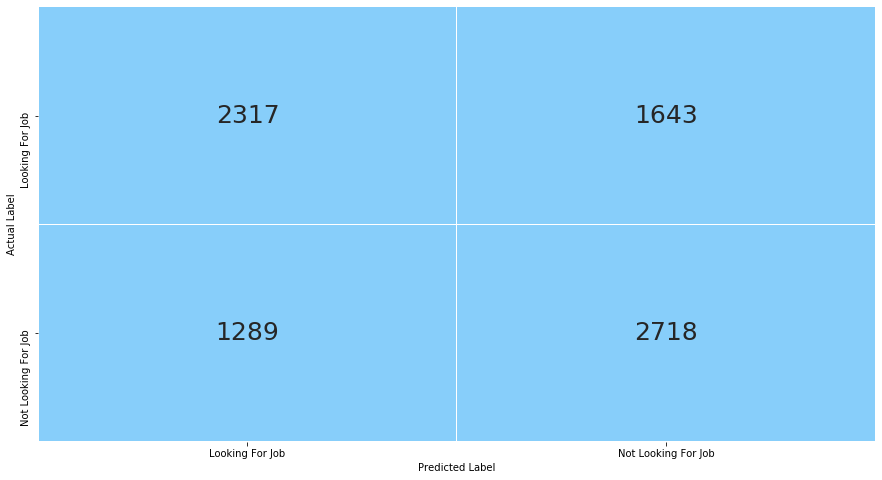

In [46]:
draw_confusion_matrix(y_test, y_pred)

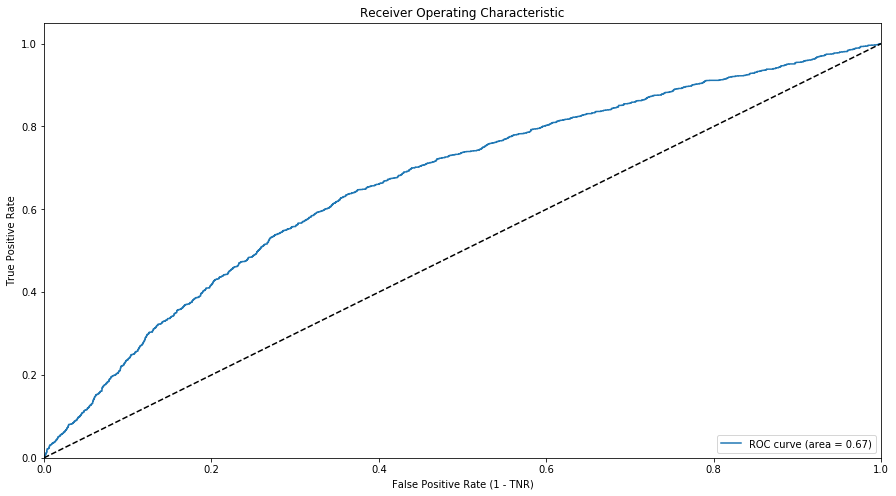

In [120]:
auc_score, fpr, tpr, threshold = draw_roc_curve(log_model, X_test, y_test)

In [121]:
# compute kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print kappa
print('kappa value:',kappa)

kappa value: 0.26355213541797706


#### Finding the threshold cutoff probability

In [122]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table.sort_values('Difference', ascending=False)[0:5]

,TPR,FPR,Threshold,Difference
2695,0.636616,0.362865,0.484127,0.273751
2693,0.636364,0.362615,0.484292,0.273748
2684,0.634848,0.361118,0.484999,0.273730
2680,0.634091,0.360369,0.485212,0.273722
2696,0.636616,0.363115,0.484080,0.273502


In [50]:
update_score_card('Logistic Regression', log_model)

In [51]:
score_card

,Algorithm Name,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,AUC Score
0,Logistic Regression,0.64254,0.585101,0.631982,0.263552,0.612477,0.631707


#### Create a model on full train set

In [52]:
log_model = LogisticRegression()
log_model.fit(df_encoded, df_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
write_to_csv('logistic_50.csv', log_model)

In [130]:
y_pred_prob = log_model.predict_proba(df_encoded_test)[:,1]

In [131]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.484127 else 1 for x in y_pred_prob]

In [134]:
df_result = pd.DataFrame({'enrollee_id': enrollee_id, 'target': y_pred})
df_result.to_csv(r"F:\Study\Data Science\Janta Hackathon\HR Analytics\Submissions\{}".format('Logistic_48.csv'), index = False)

# 2. Random Forest Classifier

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_pred_rf = rf_model.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4007
           1       0.94      0.99      0.96      3960

    accuracy                           0.96      7967
   macro avg       0.96      0.96      0.96      7967
weighted avg       0.96      0.96      0.96      7967



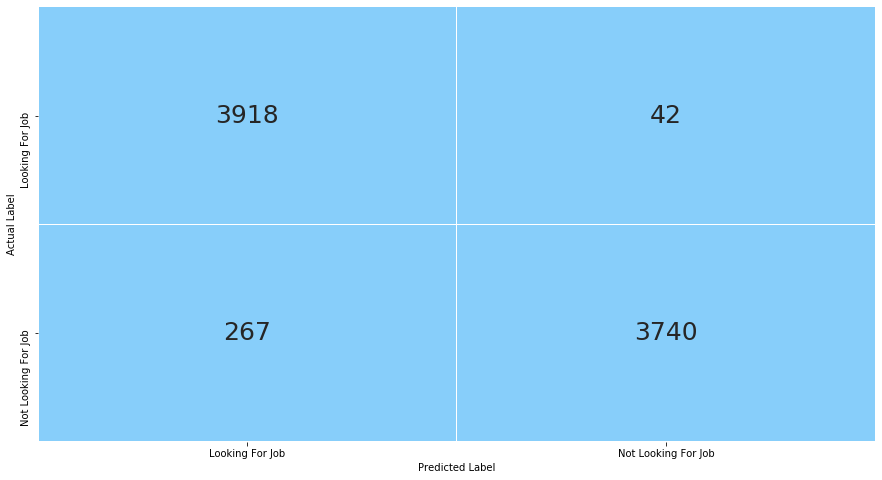

In [57]:
draw_confusion_matrix(y_test, y_pred_rf)

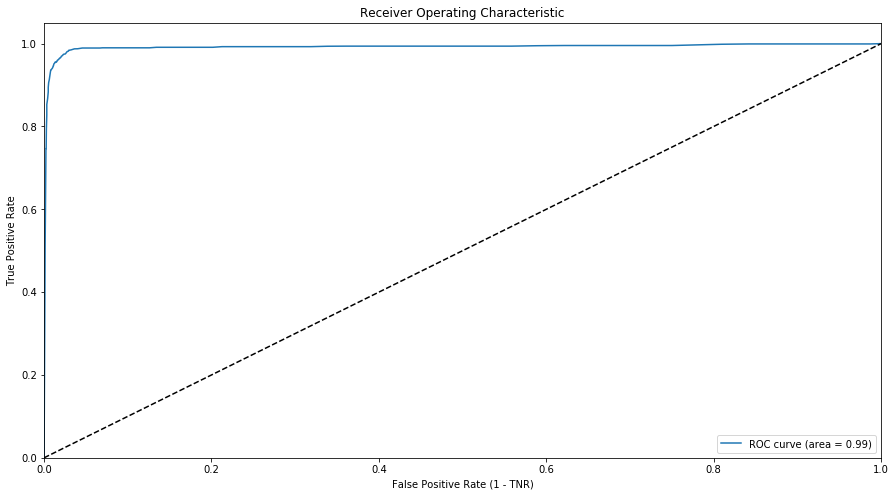

In [58]:
_,_,_,_ = draw_roc_curve(rf_model, X_test, y_test)

#### Create a model on full train set

In [60]:
rf_model = RandomForestClassifier()
rf_model.fit(df_encoded, df_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
write_to_csv('forest_full.csv', rf_model)

# 3. Light GBM Classifier

In [62]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [63]:
y_pred_lgb = lgb_model.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      4007
           1       0.72      0.75      0.74      3960

    accuracy                           0.73      7967
   macro avg       0.73      0.73      0.73      7967
weighted avg       0.73      0.73      0.73      7967



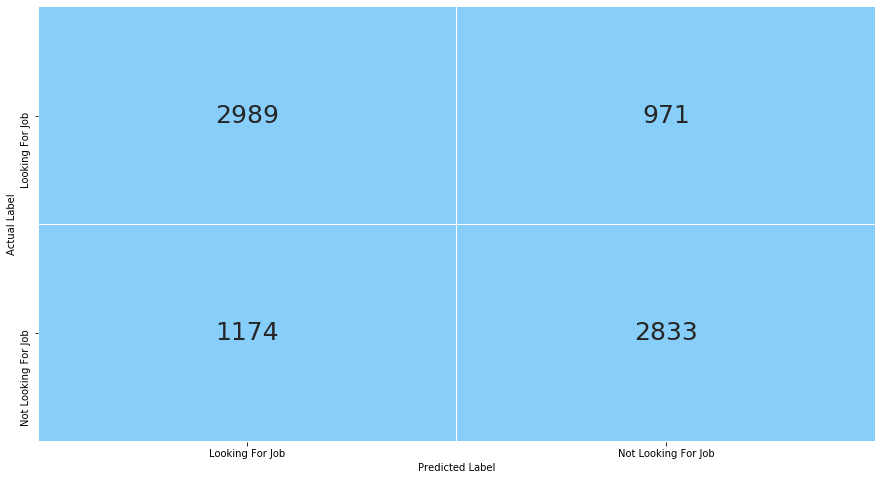

In [65]:
draw_confusion_matrix(y_test, y_pred_lgb)

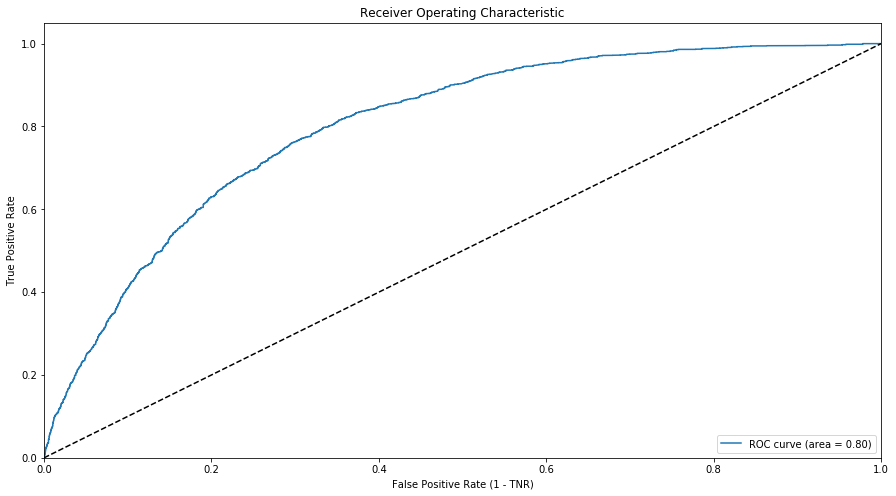

In [66]:
_,_,_,_ = draw_roc_curve(lgb_model, X_test, y_test)

In [68]:
lgb_model = LGBMClassifier()
lgb_model.fit(df_encoded, df_target)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [69]:
write_to_csv('LGB_full.csv', lgb_model)

In [85]:
lgb_model = LGBMClassifier(n_estimators=500)

tuning_parameters = {'num_leaves': [6, 12, 18, 24, 30, 36, 42, 48, 50], 
             'min_child_samples': [10, 20, 30, 50, 100, 200], 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'max_depth' : [5, 8, 15, 25, 30]}

lgb_grid = RandomizedSearchCV(
    estimator = lgb_model, 
    param_distributions=tuning_parameters, 
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=8,
    verbose=True,
    n_jobs=-1)

lgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=500, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_child_s

In [86]:
lgb_grid.best_params_

{'reg_lambda': 0.1,
 'reg_alpha': 1,
 'num_leaves': 42,
 'min_child_weight': 10.0,
 'min_child_samples': 20,
 'max_depth': 30}

In [87]:
lgb_grid.best_score_

0.8752184346853262

In [88]:
y_pred_lgb_grid = lgb_grid.predict(X_test)

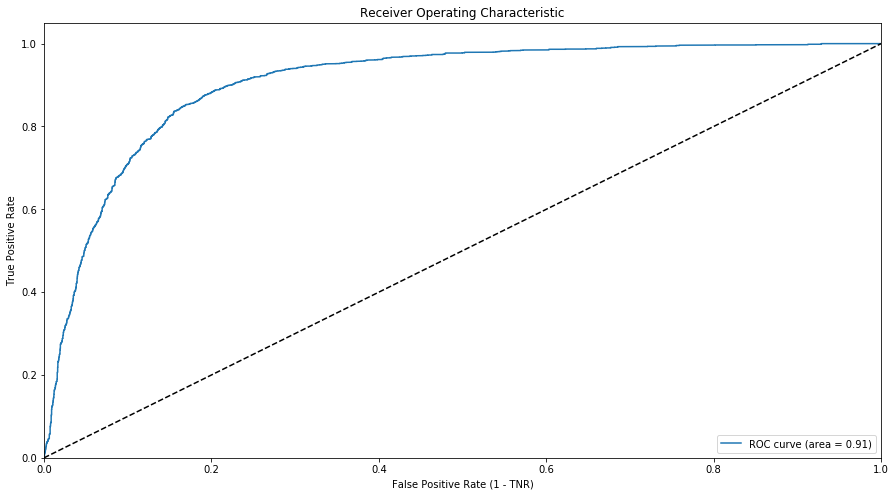

In [89]:
_,_,_,_ = draw_roc_curve(lgb_grid, X_test, y_test)

In [90]:
write_to_csv('LGB_full.csv', lgb_grid)

# 4. SGD Classifier

In [102]:
tuning_parameters = {'alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],
                    'l1_ratio': [0.01, 0.1, 0.15, 0.20, 0.25]}

sgd_model = SGDClassifier(random_state=8, shuffle=True)

sgd_grid = GridSearchCV(sgd_model, param_grid=tuning_parameters, scoring='roc_auc', n_jobs=-1)
sgd_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=8,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'l1_ratio': [0.01, 0.1, 0.15, 0.2, 0.25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False

In [103]:
sgd_grid.best_score_

0.6337073392756415

In [104]:
y_pred_sgd = sgd_grid.predict(X_test)

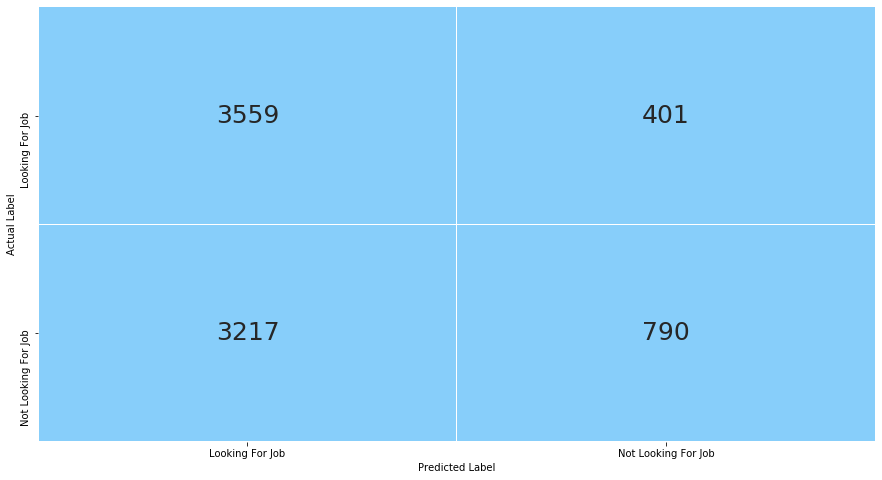

In [105]:
draw_confusion_matrix(y_test, y_pred_sgd)

In [106]:
write_to_csv('sgd.csv', sgd_grid)

# 5.Ridge Classifier

In [110]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

tuning_parameters = {'alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001]}

ridge_grid = GridSearchCV(ridge_model, param_grid=tuning_parameters, scoring='roc_auc', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

ridge_grid.best_score_

0.6655630471010822

In [112]:
y_pred_ridge = ridge_grid.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred_ridge))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      4007
           1       0.65      0.59      0.62      3960

    accuracy                           0.64      7967
   macro avg       0.64      0.64      0.64      7967
weighted avg       0.64      0.64      0.64      7967



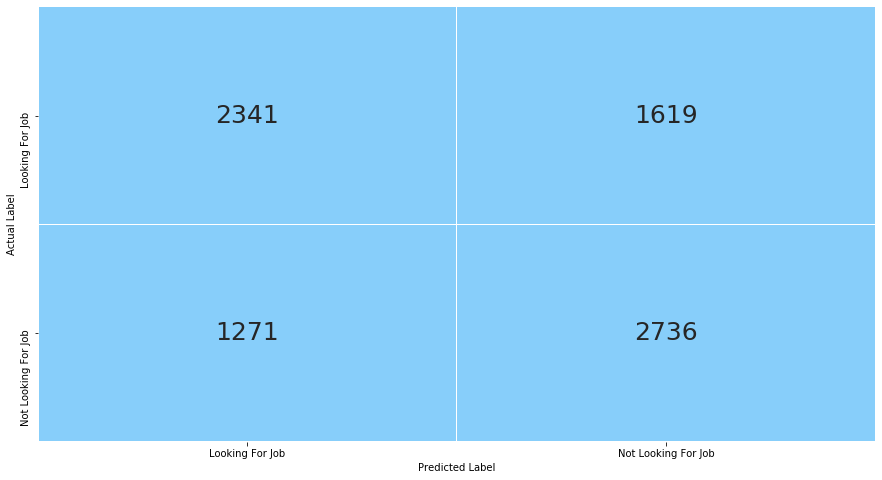

In [114]:
draw_confusion_matrix(y_test, y_pred_ridge)

In [115]:
write_to_csv('ridge.csv', ridge_grid)